<a href="https://colab.research.google.com/github/isque03/deeplearning_colab/blob/main/keras_imbd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [16]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[1]])
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [5]:
# encode integers via muli-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
# model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(16,activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# training

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/4
30/30 [==============================] - 2s 52ms/step - loss: 0.4856 - accuracy: 0.8038 - val_loss: 0.3687 - val_accuracy: 0.8718
Epoch 2/4
30/30 [==============================] - 1s 25ms/step - loss: 0.2984 - accuracy: 0.9039 - val_loss: 0.3134 - val_accuracy: 0.8818
Epoch 3/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2288 - accuracy: 0.9282 - val_loss: 0.2804 - val_accuracy: 0.8897
Epoch 4/4
30/30 [==============================] - 1s 20ms/step - loss: 0.1849 - accuracy: 0.9431 - val_loss: 0.2765 - val_accuracy: 0.8884


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

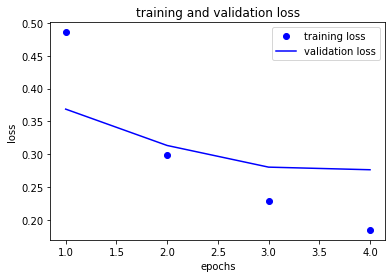

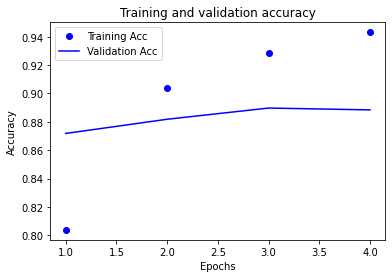

782/782 [==============================] - 3s 4ms/step - loss: 0.2977 - accuracy: 0.8784
[0.29765716195106506, 0.8783599734306335]


array([[0.28654343],
       [0.99726737],
       [0.8246375 ],
       ...,
       [0.09132475],
       [0.13567598],
       [0.5997635 ]], dtype=float32)

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values) + 1)
plt.plot(epochs,loss_values,"bo", label="training loss")
plt.plot(epochs,val_loss_values,"b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.clf();
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
results = model.evaluate(x_test,y_test)
print(results)
model.predict(x_test)

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in test_data[24999]])
decoded_review

"? a good ol' boy film is almost required to have ? car chases a storyline that has a vague resemblance to plot and at least one very pretty country gal ? with short shorts and a low top the pretty gal is here dressed in designer ? but the redneck ? stop there jimmy dean is a natural as a ? ? but as a tough guy former sheriff he comes up way short big john is big but he isn't convincing with the bad part of his ? bug eyed jack ? is a hoot as always and bo hopkins has been playing this same part for decades ned beatty also does his part in a small role but there is no story it ? more like an episode of in the heat of the night than a feature film ? with easily predictable sentiment perhaps the most glaring problem with this movie is charlie daniels singing the theme you know the one it was made famous by jimmy dean"